In [1]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import rc
import matplotlib.ticker as ticker

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

2024-08-27 22:39:06.354380: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 22:39:06.355662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 22:39:06.382357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 22:39:06.382892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 22:39:06.838528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
rc('text', usetex=False)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [4]:
#GPT

In [5]:
# 1. Load the Data
df = pd.read_pickle("data_file/master_df_final.pkl")

In [6]:
df2 = pd.read_csv("data_file/velocity.csv")
df2

Unnamed: 0     Velocity
0              0 -1532.015525
1              1 -1529.395335
2              2 -1526.775168
3              3 -1524.155023
4              4 -1521.534902
...          ...          ...
1166        1166  1507.703306
1167        1167  1510.297064
1168        1168  1512.890799
1169        1169  1515.484512
1170        1170  1518.078202

[1171 rows x 2 columns]

In [7]:
df3 = pd.read_pickle("data_file/master_df_1.pkl")
df3

Object  \
0     ADP.2014-09-29T13:27:17.100   
1     ADP.2014-09-29T13:27:14.610   
2     ADP.2014-09-29T13:27:19.680   
3     ADP.2014-09-29T13:27:08.827   
4     ADP.2014-09-29T13:27:06.927   
...                           ...   
6671  ADP.2020-03-16T01:25:54.868   
6672  ADP.2020-03-16T01:25:54.870   
6673  ADP.2020-03-16T01:25:54.872   
6674  ADP.2020-03-16T01:25:54.874   
6675  ADP.2020-03-16T01:25:54.876   

                                                   Flux       MJD-Obs  \
0     [0.8374557793140411, 0.8236213773488998, 0.827...  52940.375824   
1     [0.8208437860012054, 0.8302142471075058, 0.836...  52940.377579   
2     [0.8190981149673462, 0.8272035270929337, 0.827...  52941.379180   
3     [0.8452433347702026, 0.8275009244680405, 0.831...  52941.380924   
4     [0.8192104995250702, 0.827963575720787, 0.8273...  52942.148931   
...                                                 ...           ...   
6671  [0.8111609816551208, 0.8102160096168518, 0.804...  58923.169110   
6672  [0.8007028698921204, 0.7920275777578354, 0.811...  58923.170222   
6673  [0.8169286847114563, 0.8064793795347214, 0.816...  58923.171334   
6674  [0.8077016472816467, 0.7986242771148682, 0.813...  58923.172443   
6675  [0.7946639657020569, 0.8095797151327133, 0.803...  58923.173554   

                     Date-Obs  
0     2003-10-28T09:01:11.234  
1     2003-10-28T09:03:42.786  
2     2003-10-29T09:06:01.147  
3     2003-10-29T09:08:31.839  
4     2003-10-30T03:34:27.624  
...                       ...  
6671  2020-03-15T04:03:31.109  
6672  2020-03-15T04:05:07.165  
6673  2020-03-15T04:06:43.220  
6674  2020-03-15T04:08:19.055  
6675  2020-03-15T04:09:55.071  

[6676 rows x 4 columns]

In [8]:
#len(reconstructed_flux)

In [9]:
#flux_normalized.shape

In [10]:
# 2. Extract the Flux Data (columns 0 to 1169)
flux_data = df.iloc[:, 0:1170].values
# 3. Normalize the Flux Data
scaler = MinMaxScaler()
scaler2 = StandardScaler()
flux_normalized = scaler2.fit_transform(flux_data)

In [11]:
df

0         1         2         3         4  \
ADP.2014-09-29T13:27:17.100  0.837456  0.823621  0.827436  0.831259  0.835116   
ADP.2014-09-29T13:27:14.610  0.820844  0.830214  0.836748  0.828794  0.830047   
ADP.2014-09-29T13:27:19.680  0.819098  0.827204  0.827197  0.825538  0.833721   
ADP.2014-09-29T13:27:08.827  0.845243  0.827501  0.831953  0.828898  0.831869   
ADP.2014-09-29T13:27:06.927  0.819210  0.827964  0.827384  0.837609  0.827829   
...                               ...       ...       ...       ...       ...   
ADP.2020-03-16T01:25:54.868  0.811161  0.810216  0.804042  0.806117  0.816941   
ADP.2020-03-16T01:25:54.870  0.800703  0.792028  0.811487  0.801885  0.818235   
ADP.2020-03-16T01:25:54.872  0.816929  0.806479  0.816827  0.808939  0.819426   
ADP.2020-03-16T01:25:54.874  0.807702  0.798624  0.813674  0.809490  0.808121   
ADP.2020-03-16T01:25:54.876  0.794664  0.809580  0.803007  0.799649  0.809394   

                                    5         6         7         8         9  \
ADP.2014-09-29T13:27:17.100  0.826492  0.823784  0.828894  0.819524  0.831311   
ADP.2014-09-29T13:27:14.610  0.834472  0.831560  0.826273  0.824069  0.829600   
ADP.2014-09-29T13:27:19.680  0.824589  0.833975  0.826998  0.827212  0.825584   
ADP.2014-09-29T13:27:08.827  0.831781  0.826940  0.832694  0.823826  0.826778   
ADP.2014-09-29T13:27:06.927  0.826034  0.835372  0.820015  0.844287  0.829866   
...                               ...       ...       ...       ...       ...   
ADP.2020-03-16T01:25:54.868  0.802496  0.804587  0.809815  0.805387  0.814125   
ADP.2020-03-16T01:25:54.870  0.812957  0.800912  0.805432  0.809982  0.809695   
ADP.2020-03-16T01:25:54.872  0.828124  0.813629  0.815418  0.816412  0.815271   
ADP.2020-03-16T01:25:54.874  0.800481  0.825251  0.810596  0.816366  0.807727   
ADP.2020-03-16T01:25:54.876  0.800616  0.810451  0.818068  0.815572  0.807455   

                             ...      1162      1163      1164      1165  \
ADP.2014-09-29T13:27:17.100  ...  0.915238  0.913326  0.919205  0.917128   
ADP.2014-09-29T13:27:14.610  ...  0.915389  0.914821  0.921181  0.923494   
ADP.2014-09-29T13:27:19.680  ...  0.916505  0.920153  0.913216  0.911216   
ADP.2014-09-29T13:27:08.827  ...  0.915845  0.917230  0.912864  0.918247   
ADP.2014-09-29T13:27:06.927  ...  0.918834  0.920203  0.917090  0.927455   
...                          ...       ...       ...       ...       ...   
ADP.2020-03-16T01:25:54.868  ...  0.934555  0.944543  0.938297  0.931623   
ADP.2020-03-16T01:25:54.870  ...  0.926667  0.946139  0.943656  0.943805   
ADP.2020-03-16T01:25:54.872  ...  0.932625  0.936470  0.931544  0.935279   
ADP.2020-03-16T01:25:54.874  ...  0.937575  0.937990  0.936640  0.936352   
ADP.2020-03-16T01:25:54.876  ...  0.934407  0.936894  0.942167  0.944390   

                                 1166      1167      1168      1169  \
ADP.2014-09-29T13:27:17.100  0.919129  0.915391  0.917405  0.918169   
ADP.2014-09-29T13:27:14.610  0.921855  0.914253  0.919482  0.915859   
ADP.2014-09-29T13:27:19.680  0.915448  0.923467  0.914963  0.920705   
ADP.2014-09-29T13:27:08.827  0.918651  0.911695  0.920227  0.921852   
ADP.2014-09-29T13:27:06.927  0.911585  0.908550  0.915702  0.921109   
...                               ...       ...       ...       ...   
ADP.2020-03-16T01:25:54.868  0.933690  0.941317  0.942154  0.943022   
ADP.2020-03-16T01:25:54.870  0.941666  0.937213  0.952686  0.959267   
ADP.2020-03-16T01:25:54.872  0.944310  0.943487  0.940348  0.944231   
ADP.2020-03-16T01:25:54.874  0.931533  0.935989  0.939553  0.935566   
ADP.2020-03-16T01:25:54.876  0.939403  0.943040  0.951293  0.948478   

                                  MJD-Obs                 Date-Obs  
ADP.2014-09-29T13:27:17.100  52940.375824  2003-10-28T09:01:11.234  
ADP.2014-09-29T13:27:14.610  52940.377579  2003-10-28T09:03:42.786  
ADP.2014-09-29T13:27:19.680  52941.379180  2003-10-29T09:06:01.147  
ADP.2014-09-29T13:27:08.827  52941.380924  2003-

In [12]:
X_train, X_test = train_test_split(flux_normalized, test_size=0.2, random_state=42)

In [13]:
#len(flux_normalized)

In [14]:
#len(X_train)

In [15]:
#len(X_test)

In [16]:
#flux_data

In [17]:
#flux_normalized

In [18]:
#flux_normalized.shape[1]

In [19]:
# 4. Define the Autoencoder
input_dim = flux_normalized.shape[1]
input_layer = Input(shape=(input_dim,))

In [20]:
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#Dense: A fully connected neural network layer. The numbers (128, 64, 32) represent the number of neurons in each layer.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded) # Here the activation function was sigmoid, now is linear

#The decoder mirrors the encoder but in reverse.
#activation='sigmoid': The final layer uses the sigmoid function to ensure the output values are between 0 and 1,
#matching the normalized input data.

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse') #Mean Squared Error

# 5. Train the Autoencoder
history = autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data = [X_test, X_test],
                validation_split=0.2)

#fit: Trains the model.

#    flux_normalized: Both the input and target are the same since it's an autoencoder.
#    epochs=50: The model will iterate over the entire dataset 50 times.
#    batch_size=256: Number of samples per gradient update.
#    shuffle=True: Shuffles the data before each epoch to reduce overfitting.
#    validation_split=0.2: Uses 20% of the data for validation to monitor the model's performance on unseen data

Epoch 1/50


2024-08-27 22:51:41.647706: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-27 22:51:41.651089: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


21/21 [==============================] - 1s 9ms/step - loss: 0.7517 - val_loss: 0.5477
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5353 - val_loss: 0.5276
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5186 - val_loss: 0.5012
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4867 - val_loss: 0.4730
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4695 - val_loss: 0.4620
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4592 - val_loss: 0.4527
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4506 - val_loss: 0.4457
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4432 - val_loss: 0.4389
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4362 - val_loss: 0.4328
Epoch 10/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4299 - val_loss: 0.4273
Epoch 11/50
21/21 [===========

In [21]:
#encoded

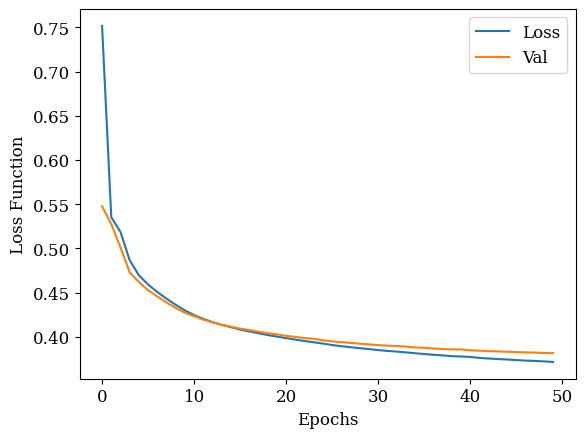

In [22]:
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label = "Val")
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.legend()
plt.show() #Comparar batch size 

In [23]:
# np.save("batch_size64_loss_function",np.array(history.history["loss"]))
# np.save("batch_size64_val_function",np.array(history.history["val_loss"]))

In [24]:
# 6. Detect Anomalies
reconstructed_flux = autoencoder.predict(flux_normalized)
mse = np.mean(np.power(flux_normalized - reconstructed_flux, 2), axis=1)

#mse: Calculates the Mean Squared Error (MSE) between the original and reconstructed data for each observation.
#High MSE indicates a poor reconstruction, which could signal an anomaly.

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

#np.percentile(mse, 95): Determines the MSE value at the 95th percentile. 
#Observations with MSE above this threshold are considered anomalies.
#anomalies = mse > threshold: A boolean array where True indicates an anomaly.

209/209 [==============================] - 0s 713us/step


In [25]:
# #anomalous_data_indices

# d = {"Flux": list(reconstructed_flux)}
# data = pd.DataFrame(data=d)
# #np.savetxt("reconstructed_flux", reconstructed_flux)

# #np.savetxt('reconstructed_flux.txt', reconstructed_flux)   # X is an array

# # df_anomalous = pd.read_pickle("default_anomalous.pkl")
# # df_anomalous

In [26]:
#data.to_pickle("reconstructed_fluxes.pkl")

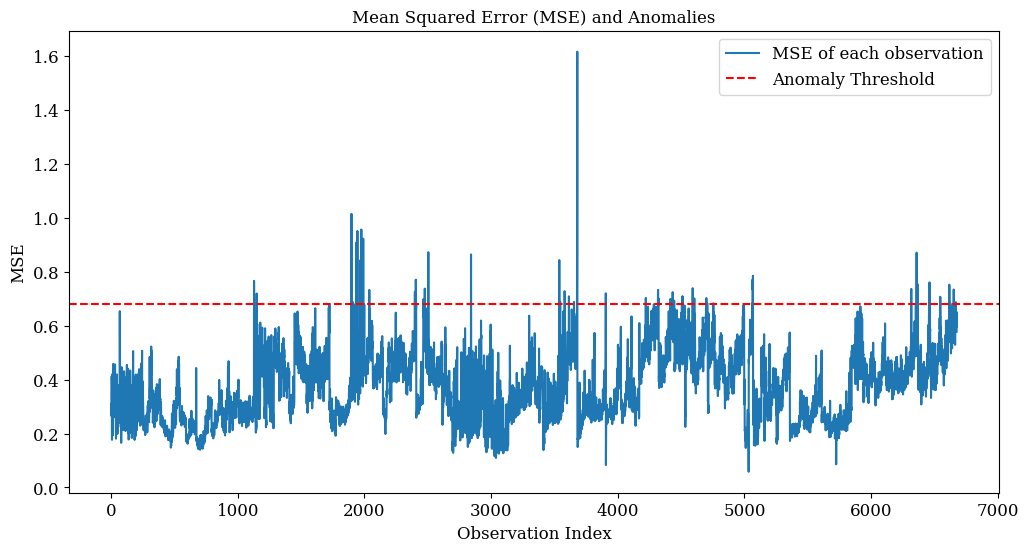

Anomalous Data Indices: [1128 1149 1897 1905 1936 1944 1967 1975 1990 2038 2398 2400 2404 2405
 2406 2408 2465 2475 2476 2504 2841 3538 3545 3580 3581 3614 3654 3678
 3679 3680 3905 4221 4317 4318 4319 4320 4322 4416 4433 4434 4445 4510
 4512 4591 4604 4699 4706 4754 5061 5064 5065 5066 5067 6317 6359 6366
 6367 6458 6460 6461 6462 6546 6617 6618 6626 6652 6669]


In [27]:
# 7. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(mse, label='MSE of each observation')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Mean Squared Error (MSE) and Anomalies')
plt.xlabel('Observation Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 8. Analyze Anomalies
anomalous_data_indices = np.where(anomalies)[0]
print(f"Anomalous Data Indices: {anomalous_data_indices}")


In [28]:
mse

array([0.29455409, 0.31050966, 0.26547586, ..., 0.59445164, 0.65095542,
       0.57741592])

In [29]:
len(anomalous_data_indices)

67

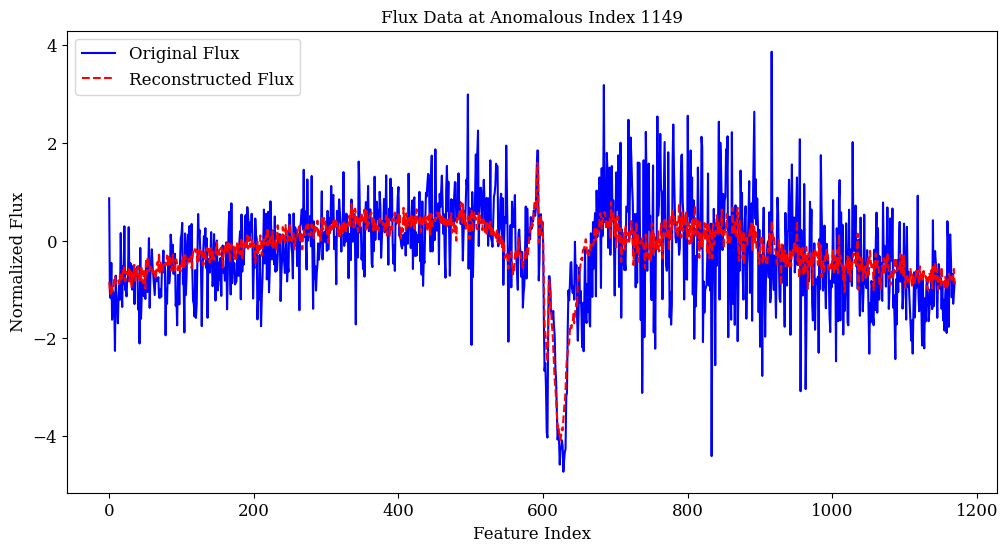

In [30]:
# Index of the first anomaly
anomalous_index = anomalous_data_indices[1]

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux', color='red', linestyle='--')
plt.title(f'Flux Data at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [31]:
########################################################

In [32]:
denormalized_output = scaler2.inverse_transform(reconstructed_flux)

# fig, ax = plt.subplots(figsize = (16,9))

# ax.set_xlabel("X-axis")
# ax.set_ylabel("Y-axis")

# ax.plot(df2["Velocity"][0:-1], df3["Flux"][14]) #Input plot
# ax.plot(df2["Velocity"][0:-1], denormalized_output[2]) #Input plot

In [33]:
#np.save("original_spectrum", df3["Flux"])

In [34]:
#np.save("reconstructed_spectrum", denormalized_output)

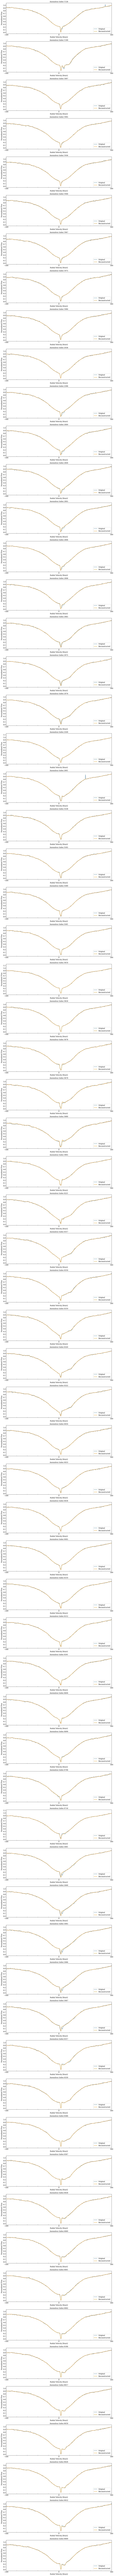

In [35]:
# AQUI FER
# Create subplots based on the number of anomalous indices
num_rows = len(anomalous_data_indices)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 4 * num_rows))  # 1 column for each index

# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    reconstructed_spectrum = denormalized_output[index]

    # Plot spectra
    ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed", color="darkorange")

    # Set subplot labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_ylabel("Normalized Flux")
    ax.set_title(f"Anomalous Index {index}")

    # Add legend
    ax.legend(loc=4)

    # Set ticks and grid (optional, adjust as needed)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)

    ax.set_xlim(-500,500)
    
# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
#plt.savefig("Anomalous_comparison_HD.png")

In [ ]:
anomalous_data_indices

In [ ]:
df3["Flux"][0] - denormalized_output[0]

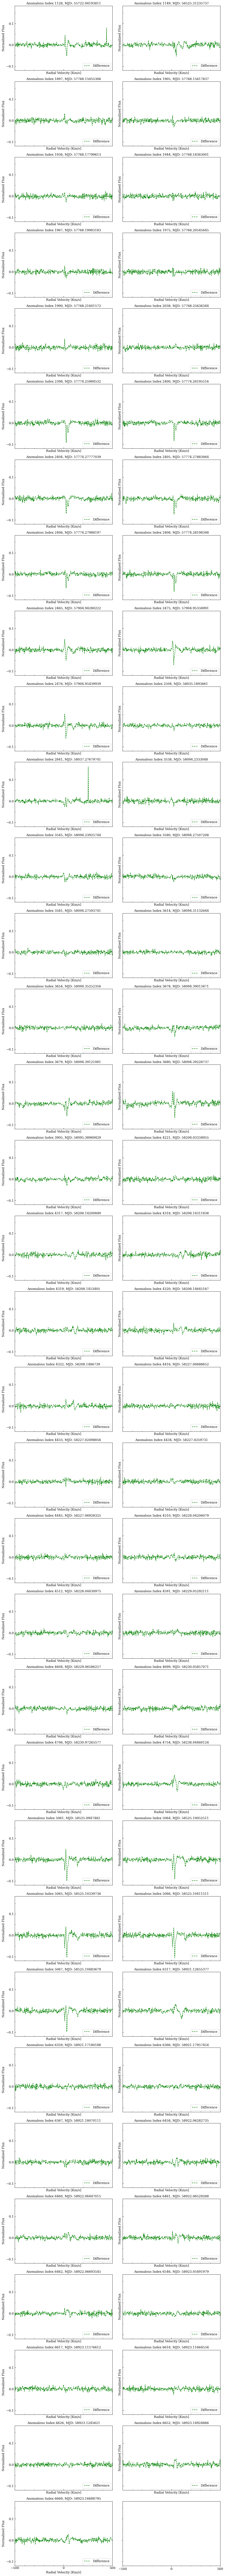

In [37]:
############################################################
num_indices = len(anomalous_data_indices)

num_cols = 2
num_rows = (num_indices + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True, sharey=True)

axes = axes.flatten()
# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    mjd = df3["MJD-Obs"][index]
    
    reconstructed_spectrum = denormalized_output[index]

    # Calculate the difference
    difference = original_spectrum - reconstructed_spectrum

    # Plot spectra and difference
    #ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    #ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed", color="darkorange")
    ax.plot(df2["Velocity"][0:-1], difference, label="Difference", color="green", linestyle="--")  # Plot the difference

    # Set subplot labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_ylabel("Normalized Flux")
    ax.set_title(f"Anomalous Index {index}, MJD: {mjd}")

    # Add legend
    ax.legend(loc=4)

    # Set ticks and grid (optional, adjust as needed)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)

    # Set x-axis limits (optional)
    ax.set_xlim(-500, 500)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
#plt.savefig("Anomalous_comparison_HD.png")

In [ ]:
## I need to check if ant of this exo comets can be crossmatched with any paper data 